# 📂 Resume Classifier with NLP

## 📘 1. Project Overview

This project aims to build a model capable of classifying resumes into job-related categories using Natural Language Processing (NLP). It will use supervised learning to predict the appropriate category of a resume based solely on its text content.

## 🎯 2. Objectives

- Load and explore a dataset of resumes
- Clean and preprocess the text data
- Vectorize the resumes into numerical features
- Train a classification model
- Evaluate model performance
- Visualize and interpret key results

## 🧾 3. Dataset Information

- **Source**: [[Link to dataset](https://www.kaggle.com/datasets/youssefkhalil/resumes-images-datasets/data)]
- **Fields**:
  - `Category`: Resume category label (e.g., IT, HR, Sales)
  - `Text`: Full resume content

In [7]:
import os
import kagglehub

# root directory for kaggle datasets (using expanduser to not depend on current working directory)
dataset_dir = os.path.expanduser("~/.cache/kagglehub/datasets/youssefkhalil/resumes-images-datasets/versions/1")

# Download latest version
# Verify if dataset is already exist
if not os.path.exists(dataset_dir):
    path = kagglehub.dataset_download("youssefkhalil/resumes-images-datasets")
    print("Dataset downloaded to:", path)
else:
    print("Dataset already exists at:", dataset_dir)

Dataset already exists at: C:\Users\maxim/.cache/kagglehub/datasets/youssefkhalil/resumes-images-datasets/versions/1


c:\Users\maxim\OneDrive\Escritorio\Portafolio\Data Analyst\Resume Classifier with NLP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Verify if the specific path exists
import os

path_test = r"C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database"
print("Path used:")
print(path_test)
print("\n Does the path exist?", os.path.exists(path_test))
print(" Is it a directory?", os.path.isdir(path_test))

Path used:
C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database

 Does the path exist? True
 Is it a directory? True


In [9]:
# Take a look of what is inside the directory
print("\nFiles in the directory resume_database:")
print(os.listdir(path_test))


Files in the directory resume_database:
['Accountant', 'Advocate', 'Agricultural', 'Arts', 'Aviation', 'Banking', 'Consultant', 'Data Science', 'Database', 'Designer', 'DevOps Engineer', 'Digital Media', 'Education', 'ETL Developer', 'Human Resources', 'Information Technology', 'Management', 'Python Developer', 'React Developer', 'SAP Developer', 'Testing']


In [10]:
# Loop through only one subfolder as test (Data Science)
test_subfolder = os.path.join(path_test, "Data Science")
print("\nDoes Data Science's folder exist?", os.path.exists(test_subfolder))

files = os.listdir(test_subfolder)
print("\nFiles in the Data Science folder:", files[:5])


Does Data Science's folder exist? True

Files in the Data Science folder: ['0.docx', '0.png', '1.docx', '1.png', '10.docx']


In [11]:
# Verify if reconized file extensions correctly
valid_extensions = ['.docx', '.pdf', '.png', '.jpg', '.jpeg']

valid_files = [f for f in files if os.path.splitext(f)[1].lower() in valid_extensions]
print("\nValid files in the Data Science folder:", valid_files[:5])
print("Number of valid files:", len(valid_files))


Valid files in the Data Science folder: ['0.docx', '0.png', '1.docx', '1.png', '10.docx']
Number of valid files: 400


In [12]:
import pandas as pd

# list of data
data = []

# iterate through all files in the directory
for root, dirs, files in os.walk(path_test):
    print(f'exploring {root}')
    for file in files:
        ext = os.path.splitext(file)[1]
        if ext in valid_extensions:
            file_path = os.path.join(root, file)
            label = os.path.basename(os.path.dirname(file_path))
            print(f"Valid file found: {file_path}")
            data.append({
                "file_path": file_path.replace("\\", "/"),
                "label": label,
                "extension": ext.lower()
            })
            
# Create a DataFrame from the data
df = pd.DataFrame(data)

print(f"\n Total valid files found: {len(df)}")

if len(df) > 0:
    display(df.sample(5))
else:
    print("No valid files found")

exploring C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database
exploring C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant\0.docx
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant\0.png
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant\1.docx
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-datasets\versions\1\Resumes Datasets\resume_database\Accountant\1.png
Valid file found: C:\Users\maxim\.cache\kagglehub\datasets\youssefkhalil\resumes-images-d

,file_path,label,extension
3124,C:/Users/maxim/.cache/kagglehub/datasets/youss...,DevOps Engineer,.png
122,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Accountant,.docx
3138,C:/Users/maxim/.cache/kagglehub/datasets/youss...,DevOps Engineer,.png
4313,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Management,.png
998,C:/Users/maxim/.cache/kagglehub/datasets/youss...,Agricultural,.docx


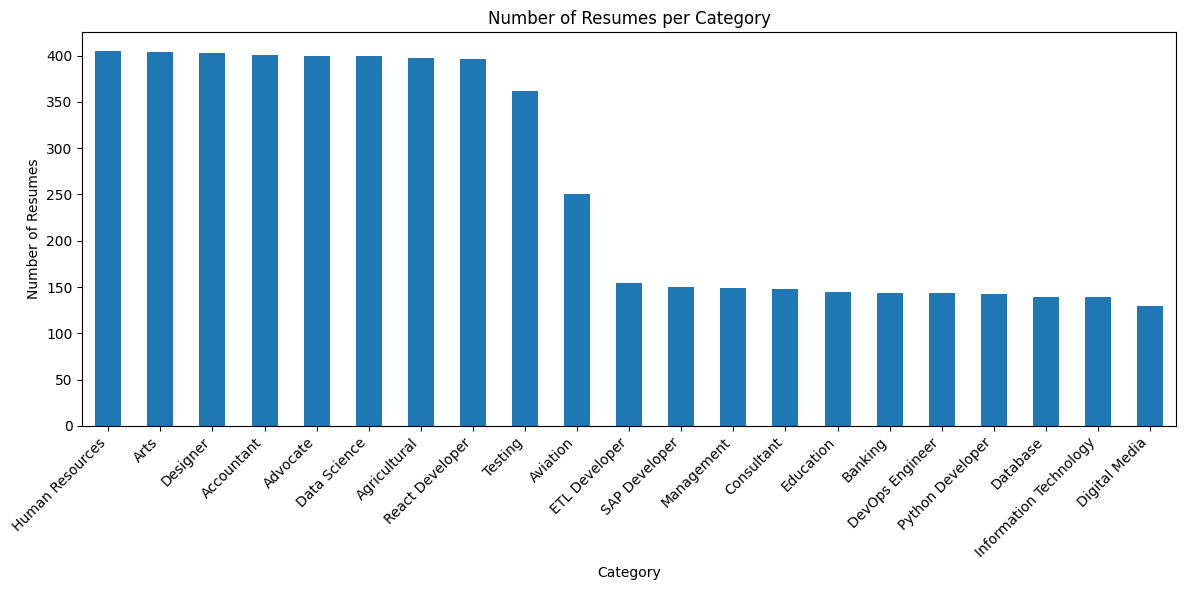

In [13]:
# Graphic if number of Resumes vs Category
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
df['label'].value_counts().plot(kind='bar')
plt.title('Number of Resumes per Category')
plt.xlabel('Category')
plt.ylabel('Number of Resumes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
#This script doesn't work correctly, it was fixed with the code above.

#import os
#import pandas as pd
# Alternative root directory for datasets
#base_path = os.path.join("resumes-images-datasets", "versions", "1", "Resumes Datasets", "resume_database")

#print("Base path to use:", base_path)
#print("Does the folder exist?", os.path.exists(base_path))

# Validate extension of files
#valid_extensions = ['.docx', '.pdf', '.png', '.jpg', '.jpeg',
#                    '.DOCX', '.PDF', '.PNG', '.JPG', '.JPEG']

# list of data
#data = []

# iterate through all files in the directory
#for root, dirs, files in os.walk(base_path):
#    print(f'exploring {root}')
#    for file in files:
#        ext = os.path.splitext(file)[1]
#        if ext in valid_extensions:
#            file_path = os.path.join(root, file)
#            label = os.path.basename(os.path.dirname(file_path))
#            print(f"Valid file found: {file_path}")
#            data.append({
#                "file_path": file_path.replace("\\", "/"),
#                "label": label,
#                "extension": ext.lower()
#            })
            
# Create a DataFrame from the data
#df = pd.DataFrame(data)

#print(f"\n Total valid files found: {len(df)}")

#if len(df) > 0:
#    display(df.sample(5))
#else:
#    print("No valid files found")

In [15]:
# Count of extensions
from collections import Counter
import os

# Extension count
ext_counts = Counter()

# Loop through dataset
for root, dirs, files in os.walk(path_test):
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        ext_counts[ext]+=1

# Display counts
for ext, count in ext_counts.items():
    print(f"Extension: {ext}, Count: {count}")

Extension: .docx, Count: 1821
Extension: .png, Count: 3581


## 🔍 4. Initial Exploration

Here we inspect the size of the dataset, class distribution, and look at a few examples.

In [16]:
from docx import Document
import pandas as pd
import os
from tqdm import tqdm

# Filter the DataFrame to only include .docx files
docx_files = df[df['extension']== '.docx'].copy()

# Function to extract text from .docx files
def extract_text_from_docx(file_path):
    try:
        doc = Document(file_path)
        text = "\n".join([para.text for para in doc.paragraphs])
        return text.strip()
    except Exception as e:
        print(f'Error reading {file_path}: {e}')
        return ""
    
# Apply the function to all .docx files
tqdm.pandas(desc="Extracting text from .docx files")
docx_df['text'] = docx_df['file_path'].progress_apply(extract_text_from_docx)

# Show some results
docx_df.sample(3)[['file_path', 'label', 'text']]

ModuleNotFoundError: No module named 'docx'

## 🧹 5. Text Cleaning & Preprocessing

- Lowercasing
- Removing punctuation
- Removing stopwords
- Stemming or Lemmatization
- Tokenization

## 🔡 6. Vectorization

We convert text data into numerical format using:
- `CountVectorizer` or
- `TfidfVectorizer`

## 🤖 7. Model Training

We train and test several models:
- Naive Bayes
- Logistic Regression
- Support Vector Machine (optional)

## 📈 8. Evaluation

We use:
- Accuracy
- Precision, Recall, F1-score
- Confusion Matrix
- Classification Report

## 🔍 9. Interpretation

We explore the most relevant words per class and potential model biases.

## 📊 10. Visualization

Graphs that help communicate the model’s performance and dataset structure.

## ✅ 11. Conclusions

Key takeaways, strengths, limitations, and potential improvements.

## 🚀 12. Next Steps (Optional)

Ideas for future improvements:
- Use real resumes or larger datasets
- Deploy the model in a web app with Streamlit
- Add resume parsing (PDF, DOCX)